In [1]:
! tree -h ../sample_data/trial_0

../sample_data/trial_0
├── [ 15K]  degree_histogram.png
├── [1.6K]  edges.csv
├── [ 69K]  force_directed.png
├── [1.1K]  mapping.csv
├── [  22]  seed.txt
├── [ 18K]  spectral.png
├── [ 156]  summary.txt
└── [ 58K]  ts.csv

0 directories, 8 files


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

mapping = pd.read_csv("../sample_data/trial_0/mapping.csv")
ts = pd.read_csv("../sample_data/trial_0/ts.csv")
g = nx.from_pandas_edgelist(
    pd.read_csv('../sample_data/trial_0/edges.csv'), 
    source="src", 
    target="dst"
)

In [3]:
mapping.head()

,id,title,is_redirect,is_new,pagerank
0,645042,New_York_City,False,False,1.377563
1,18110,Los_Angeles,False,False,1.271034
2,2855554,IMDb,False,False,1.194865
3,28326844,2008_in_television,False,False,1.088134
4,29850360,2011_in_television,False,False,1.088134


In [4]:
df = pd.merge(mapping[["id", "pagerank", "title"]], ts, on="id")
df.head()

,id,pagerank,title,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,...,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01
0,645042,1.377563,New_York_City,13517.0,9286.0,9041.0,7655.0,7680.0,5895.0,6188.0,...,5741.0,5906.0,4281.0,5839.0,6339.0,6575.0,6554.0,5876.0,5578.0,4271.0
1,18110,1.271034,Los_Angeles,2771.0,4346.0,4158.0,4088.0,4002.0,3716.0,3780.0,...,3150.0,2610.0,2704.0,3427.0,3710.0,3425.0,3541.0,3259.0,3362.0,2628.0
2,2855554,1.194865,IMDb,3224.0,3674.0,3683.0,3562.0,3366.0,3241.0,3400.0,...,2512.0,3137.0,2428.0,2940.0,2836.0,2811.0,2681.0,2590.0,4322.0,2811.0
3,52371638,1.046284,2017_in_television,208.0,143.0,135.0,126.0,NaN,NaN,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38539,1.039490,Reality_television,342.0,480.0,463.0,510.0,446.0,490.0,521.0,...,343.0,279.0,294.0,429.0,427.0,423.0,426.0,355.0,263.0,304.0


In [5]:
df.columns[3:]

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27',
       '2019-08-28', '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01'],
      dtype='object', length=608)

In [6]:
df.title[:5].values

array(['New_York_City', 'Los_Angeles', 'IMDb', '2017_in_television',
       'Reality_television'], dtype=object)

In [9]:
df.columns[:3]

Index(['id', 'pagerank', 'title'], dtype='object')

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


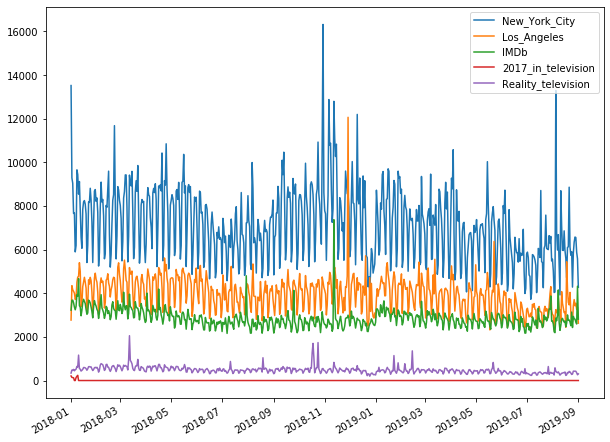

In [7]:
k = 5
dates = pd.to_datetime(df.columns[3:])
labels = df.title[:k].values
X = df.iloc[:k,3:].fillna(0).values.T

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(dates, X)
ax.legend(labels)
fig.autofmt_xdate()

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


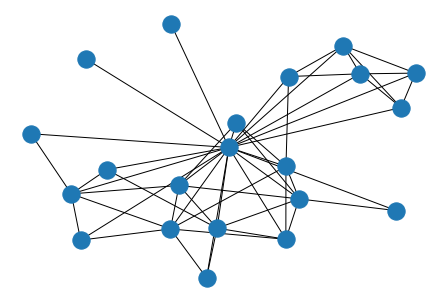

In [10]:
nx.draw(g)

In [11]:
X = ts.iloc[:,1:].fillna(0).values
X

array([[ 288.,  327.,  353., ...,  118.,    0.,    0.],
       [2908., 3134., 3332., ..., 1329., 1101., 1070.],
       [ 342.,  480.,  463., ...,  355.,  263.,  304.],
       ...,
       [2074., 2728., 3025., ..., 2340., 1879., 1826.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 125.,  252.,  292., ...,  208.,  158.,  160.]])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.7210067  0.22981287]
[192152.41506428 108483.42046938]


In [13]:
reduced = pca.fit_transform(X)

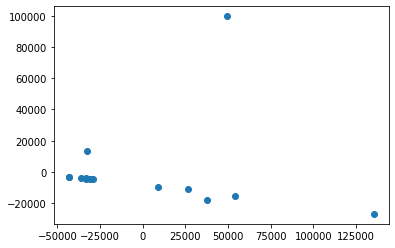

In [14]:
x, y = map(list, zip(*reduced))
plt.scatter(x, y)